In [36]:
#!pip install pywaffle

In [37]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

In [38]:
df = pd.read_csv('../data/fenomeno/violenza/Tipo di autore, età della donna (2014).csv')
df = df[["TIPO_DATO_VIOLENZA", "Tipo dato", "TIPOAUT", "Tipo di autore", "TIPOVIOLENZA", "Tipo di violenza", "ETA1", "Età della donna", "Value"]]
df.head()

,TIPO_DATO_VIOLENZA,Tipo dato,TIPOAUT,Tipo di autore,TIPOVIOLENZA,Tipo di violenza,ETA1,Età della donna,Value
0,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,Y16-70,16-70 anni,31.5
1,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHY,violenza fisica,Y16-70,16-70 anni,20.2
2,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),SEXVIOL,violenza sessuale,Y16-70,16-70 anni,21.0
3,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),RAPE_OR_ATT,stupro o tentato stupro,Y16-70,16-70 anni,5.4
4,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,NOP,uomo non partner,PHSEX,violenza fisica o sessuale,Y16-70,16-70 anni,24.7


In [39]:
df_phsex = df[df["TIPOVIOLENZA"]=="PHSEX"]
df_phsex_all = df_phsex[df_phsex["TIPOAUT"]=="ANY_P_NOP"]
df_phsex_all_life = df_phsex_all[df_phsex_all["TIPO_DATO_VIOLENZA"] == "W16_70_PNP_LT"]
df_phsex_all_life#[["Età della donna","Value"]].set_index("Età della donna").to_dict()

,TIPO_DATO_VIOLENZA,Tipo dato,TIPOAUT,Tipo di autore,TIPOVIOLENZA,Tipo di violenza,ETA1,Età della donna,Value
0,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,Y16-70,16-70 anni,31.5
60,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,Y25-34,25-34 anni,35.9
120,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,Y35-44,35-44 anni,35.1
180,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,Y45-54,45-54 anni,34.4
240,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,Y55-64,55-64 anni,28.2
300,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,Y16-24,16-24 anni,29.4
360,W16_70_PNP_LT,donne di 16-70 anni che hanno subito violenza ...,ANY_P_NOP,qualsiasi uomo (partner e non partner),PHSEX,violenza fisica o sessuale,Y65-70,65-70 anni,18.7


In [40]:
reordered = df_phsex_all_life[df_phsex_all_life["ETA1"] != "Y16-70"][["Età della donna","Value"]].set_index("Età della donna").sort_index()
reordered

,Value
Età della donna,
16-24 anni,29.4
25-34 anni,35.9
35-44 anni,35.1
45-54 anni,34.4
55-64 anni,28.2
65-70 anni,18.7


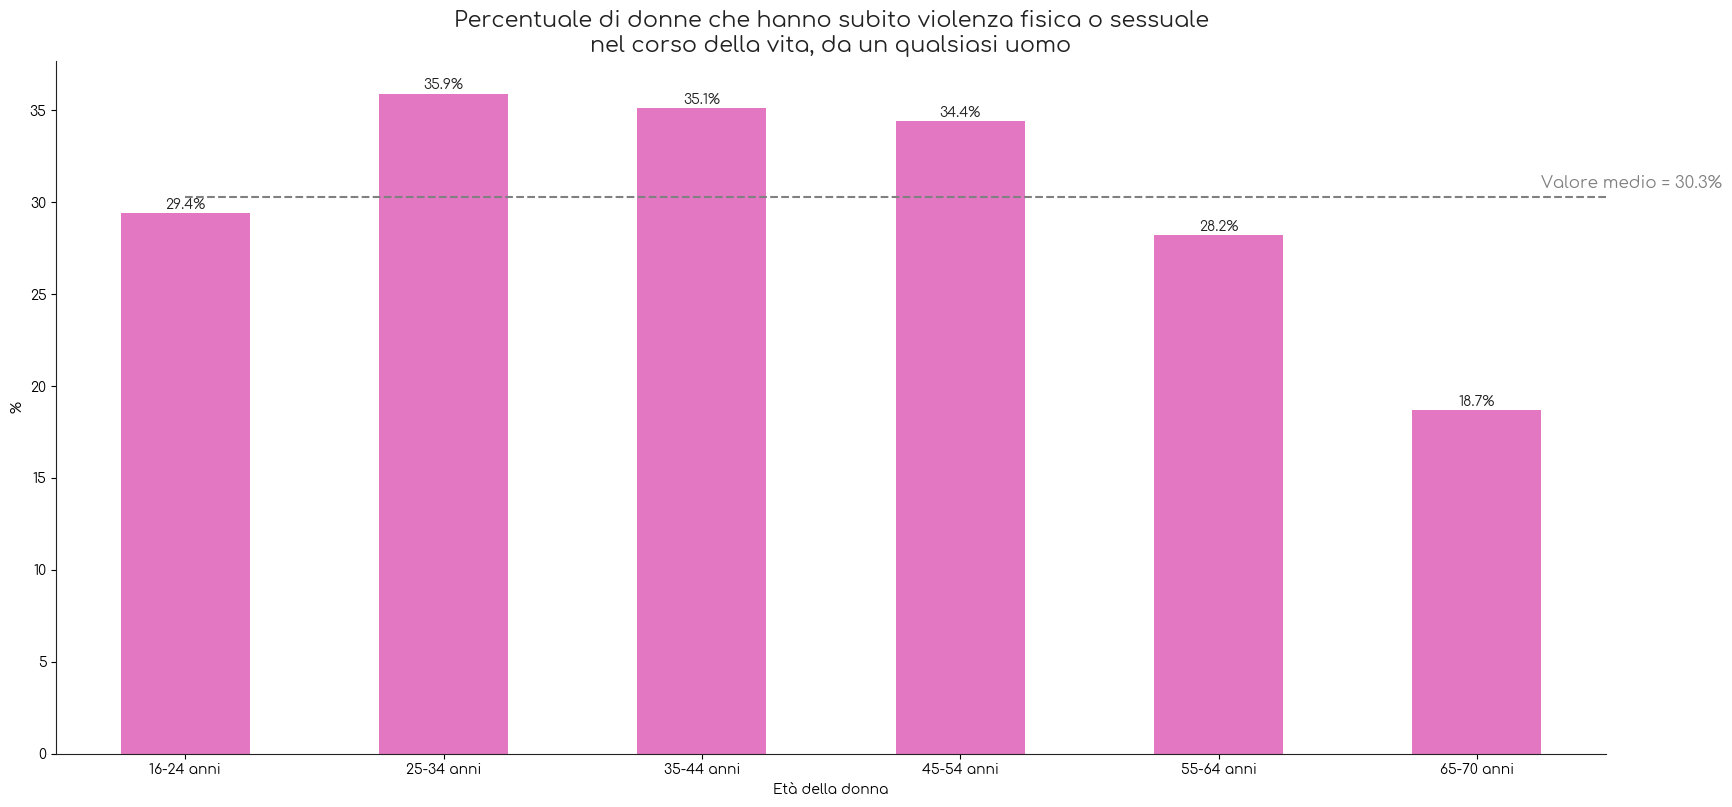

In [41]:
fig, ax = plt.subplots(figsize=(20,9))

mean = reordered["Value"].mean()

reordered.plot.bar(ax=ax, color='C6')

plt.bar_label(ax.containers[0], padding=1, fmt='%.1f%%')

plt.xticks(np.arange(len(reordered)), reordered.index, rotation=0)

plt.plot(np.arange(len(df_phsex_all_life)), [mean]*len(df_phsex_all_life), linestyle='--', color='gray')
plt.annotate(f"Valore medio = {mean:.1f}%", (5.25, mean+0.5), fontsize=12, color='gray')

plt.legend([], frameon=False)

plt.title("Percentuale di donne che hanno subito violenza fisica o sessuale\nnel corso della vita, da un qualsiasi uomo")
plt.ylabel('%')
plt.show()

In [42]:
reordered.mean()

Value    30.283333
dtype: float64

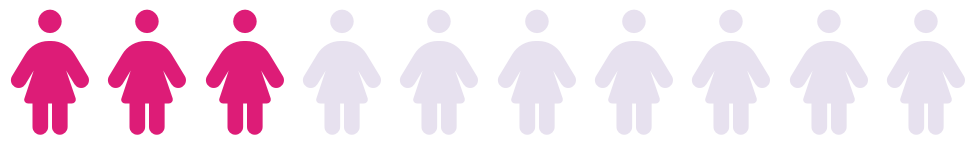

In [43]:
from pywaffle import Waffle

data = {'':3, '16-70 anni':7}

fig = plt.figure(
    FigureClass=Waffle,
    rows=1, 
    values=data,
    colors=['#dd1c77','#e7e1ef'],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='person-dress', icon_size=90, 
    vertical=True,
    icon_legend=True
)

plt.legend('',frameon=False)
plt.show()

Stessa analisi, da parte di partner o ex partner:

In [44]:
df_partner = df[(df["TIPO_DATO_VIOLENZA"] == "W16_70_CP_LT") & (df["TIPOVIOLENZA"] == "PHSEX")]
df_partner

,TIPO_DATO_VIOLENZA,Tipo dato,TIPOAUT,Tipo di autore,TIPOVIOLENZA,Tipo di violenza,ETA1,Età della donna,Value
36,W16_70_CP_LT,donne di 16-70 anni che hanno subito violenza ...,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,Y16-70,16-70 anni,5.2
96,W16_70_CP_LT,donne di 16-70 anni che hanno subito violenza ...,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,Y25-34,25-34 anni,4.3
156,W16_70_CP_LT,donne di 16-70 anni che hanno subito violenza ...,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,Y35-44,35-44 anni,4.6
216,W16_70_CP_LT,donne di 16-70 anni che hanno subito violenza ...,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,Y45-54,45-54 anni,5.9
276,W16_70_CP_LT,donne di 16-70 anni che hanno subito violenza ...,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,Y55-64,55-64 anni,6.2
336,W16_70_CP_LT,donne di 16-70 anni che hanno subito violenza ...,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,Y16-24,16-24 anni,3.2
396,W16_70_CP_LT,donne di 16-70 anni che hanno subito violenza ...,CURR_P,partner attuale,PHSEX,violenza fisica o sessuale,Y65-70,65-70 anni,5.8


In [45]:
df_partner[df_partner["ETA1"] != "Y16-70"].mean()

C:\Users\Federico Coscia\AppData\Local\Temp\ipykernel_4964\1594383626.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_partner[df_partner["ETA1"] != "Y16-70"].mean()


Value    5.0
dtype: float64

ex partner:

In [46]:
df_ex_partner = df[(df["TIPO_DATO_VIOLENZA"] == "W16_70_FP_LT") & (df["TIPOVIOLENZA"] == "PHSEX")]
df_ex_partner

,TIPO_DATO_VIOLENZA,Tipo dato,TIPOAUT,Tipo di autore,TIPOVIOLENZA,Tipo di violenza,ETA1,Età della donna,Value
44,W16_70_FP_LT,donne di 16-70 anni che hanno subito violenza ...,EX_P,ex partner,PHSEX,violenza fisica o sessuale,Y16-70,16-70 anni,18.9
108,W16_70_FP_LT,donne di 16-70 anni che hanno subito violenza ...,EX_P,ex partner,PHSEX,violenza fisica o sessuale,Y25-34,25-34 anni,19.0
168,W16_70_FP_LT,donne di 16-70 anni che hanno subito violenza ...,EX_P,ex partner,PHSEX,violenza fisica o sessuale,Y35-44,35-44 anni,20.2
228,W16_70_FP_LT,donne di 16-70 anni che hanno subito violenza ...,EX_P,ex partner,PHSEX,violenza fisica o sessuale,Y45-54,45-54 anni,22.4
288,W16_70_FP_LT,donne di 16-70 anni che hanno subito violenza ...,EX_P,ex partner,PHSEX,violenza fisica o sessuale,Y55-64,55-64 anni,16.8
348,W16_70_FP_LT,donne di 16-70 anni che hanno subito violenza ...,EX_P,ex partner,PHSEX,violenza fisica o sessuale,Y16-24,16-24 anni,15.7
408,W16_70_FP_LT,donne di 16-70 anni che hanno subito violenza ...,EX_P,ex partner,PHSEX,violenza fisica o sessuale,Y65-70,65-70 anni,10.1


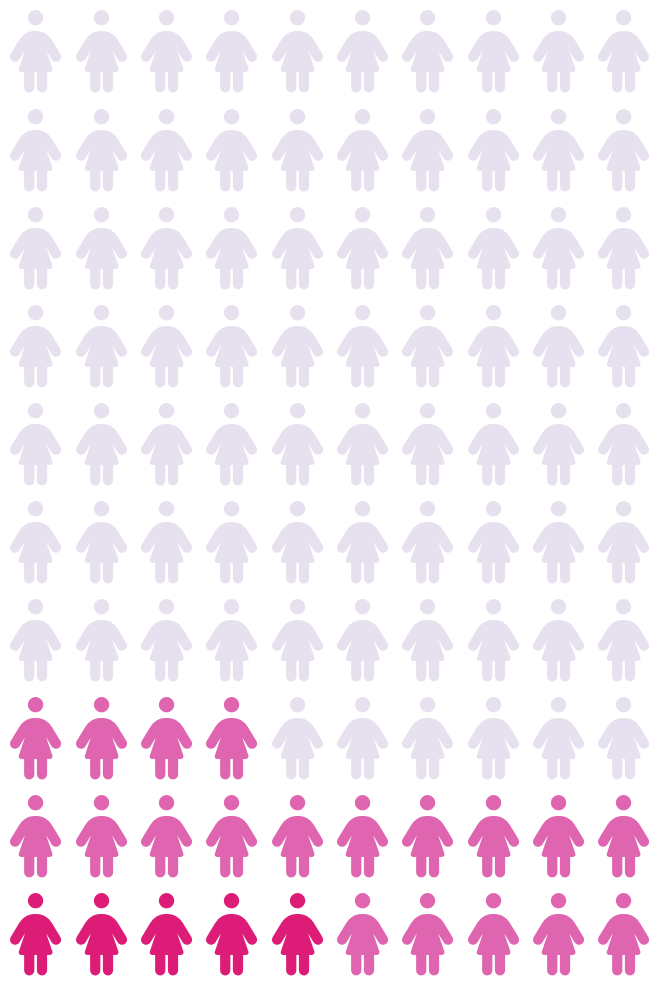

In [47]:
data = {'partner':5, 'ex-partner':19,'altre':100-5-19}

fig = plt.figure(
    FigureClass=Waffle,
    rows=10, 
    values=data,
    colors=['#dd1c77', '#df65b0', '#e7e1ef'],
    legend={'loc': 'upper left',
            'bbox_to_anchor': (0.75,1.15),
            # 'frameon':False,
            'fontsize':12,
            'title':'Tipo di autore',
            'shadow':False,
            'title_fontproperties':{'weight':'bold'}},
    icons='person-dress',
    icon_size=59,
    # block_arranging_style='new-line',
    vertical=True,
    icon_legend=True,
    interval_ratio_x=1,
    interval_ratio_y=2,
    starting_location='SW'
)

plt.legend('', frameon=False)
plt.show()

In [48]:
from PIL import ImageColor
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def change_color(img, color):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    a = img[:,:,3]
    rr, gg, bb = ImageColor.getcolor(color, "RGB")
    return np.dstack((np.full_like(r, rr/255), np.full_like(g, gg/255), np.full_like(b, bb/255), a))

def imscatter(x, y, image, percentage=1, colors=['#ff0000', '#eeeeee'], ax=None, zoom=1):

    if ax is None:
        ax = plt.gca()

    image = plt.imread(image)

    x, y = np.atleast_1d(x, y)
    artists = []

    i = 0
    for x0, y0 in zip(x, y):

        if (i < len(x)*percentage):
            image = change_color(image, colors[0])
        else:
            image = change_color(image, colors[1])
            
        im = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
        
        i += 1

    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

    return artists

Percentuale di donne che nella loro vita (16-70 anni) subiscono violenza fisica o sessuale dal proprio partner attuale:

In [55]:
df_partner[df_partner["ETA1"] == "Y16-70"]["Value"]

36    5.2
Name: Value, dtype: float64

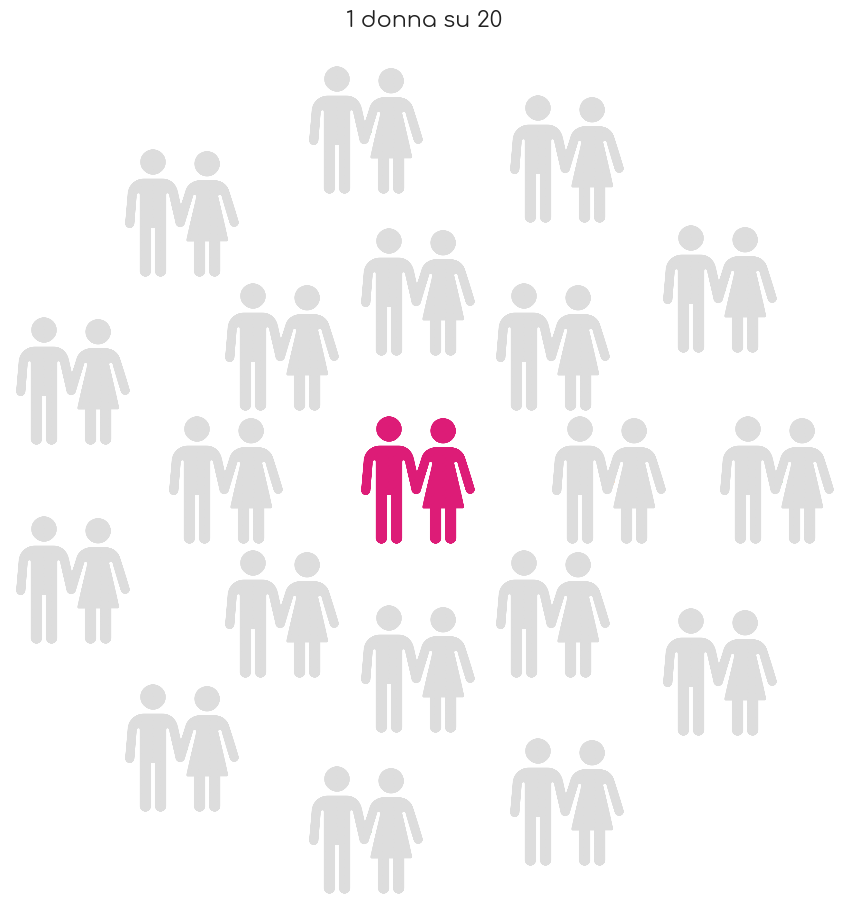

In [49]:
def plot_circum(n, r):
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = r * np.cos(angles)
    y = r * np.sin(angles)
    plt.scatter(x,y)
    return x, y

fig, ax = plt.subplots(figsize=(10,10))

x0, y0 = plot_circum(1,0.000001)
x1, y1 = plot_circum(8, 0.4)
x2, y2 = plot_circum(11, 0.75)

x = np.concatenate((x0, x1, x2))
y = np.concatenate((y0, y1, y2))

imscatter(x, y, '../images/couple.png', colors=['#dd1c77', '#dddddd'], percentage=1/20, zoom=0.23)
plt.title("1 donna su 20", loc='center', pad=50)
plt.axis('off')
plt.show()

Percentuale di donne che nella loro vita (16-70 anni) subiscono violenza fisica o sessuale dal un ex-partner:

In [56]:
df_ex_partner[df_ex_partner["ETA1"] == "Y16-70"]["Value"]

44    18.9
Name: Value, dtype: float64

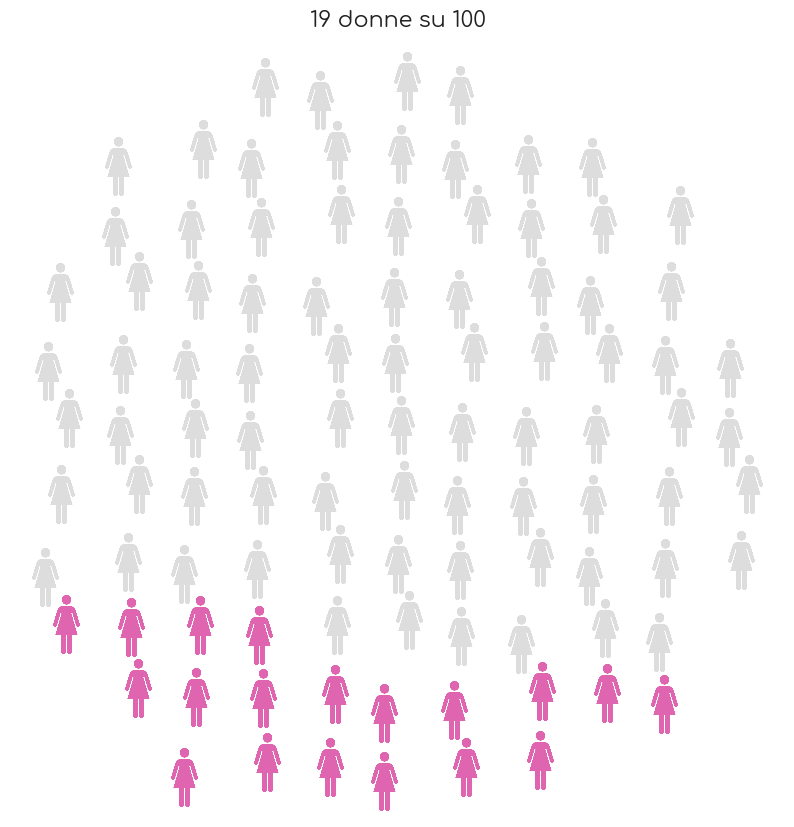

In [50]:
import math
import random

fig, ax = plt.subplots()

n = 102
radius = math.sqrt(n/np.pi)

x = []
y = []

i = 0
for y1 in (np.arange(2*radius) - radius):
    for x1 in (np.arange(2*radius)- radius):
        if (x1**2 + y1**2 < radius**2):
            noise = random.uniform(-0.2,0.2)
            x.append(x1 + noise)
            y.append(y1 + noise)
            i += 1

plt.scatter(x,y)

imscatter(x, y, '../images/woman.png', colors=['#df65b0', '#dddddd'], percentage=19/100, zoom=0.06)
plt.axis('off')
plt.title("19 donne su 100", pad=15)
plt.show()

Tenendo a mente che le percentuali sono 5% e 19%, realizzo due cerchi con dimensioni relative di 5/19:

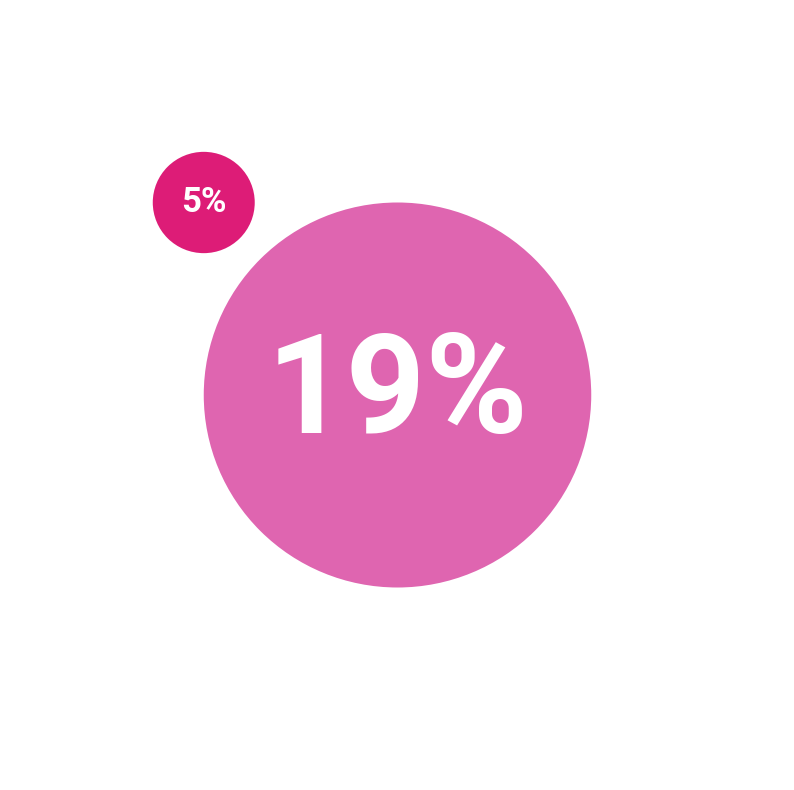

In [52]:
circle1 = plt.Circle((0.5, 0.5), 0.5, fc='#df65b0')
fig = plt.gcf()
fig.gca().add_artist(circle1)
plt.annotate("19%", (0.5,0.5), color='w', ha='center', va='center', font='Roboto', fontsize=100, weight='bold')

circle2 = plt.Circle((0, 1), 0.5*5/19, fc='#dd1c77')
fig = plt.gcf()
fig.gca().add_artist(circle2)
plt.annotate("5%", (0.,1), color='w', ha='center', va='center', font='Roboto', fontsize=25, weight='bold')

plt.axis('off')
ax = plt.gca()
ax.set_xlim(xmin=-0.5, xmax=1.5)
ax.set_ylim(ymin=-0.5, ymax=1.5)
plt.show()